In [16]:
import gym
import gym_anytrading

from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt



In [23]:
df = pd.read_csv('gmedata.csv')

In [24]:
df.head()

,Date,Open,High,Low,Close,Volume
0,01/06/2022,132.84,137.70,121.14,131.03,"6,051,480"
1,01/05/2022,148.39,148.85,129.15,129.37,"3,396,400"
2,01/04/2022,152.17,152.99,143.05,148.91,"1,834,894"
3,01/03/2022,149.23,159.38,149.21,152.84,"1,417,001"
4,12/31/2021,153.62,156.73,148.10,148.39,"1,393,964"


In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [26]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-06,132.84,137.70,121.14,131.03,"6,051,480"
2022-01-05,148.39,148.85,129.15,129.37,"3,396,400"
2022-01-04,152.17,152.99,143.05,148.91,"1,834,894"
2022-01-03,149.23,159.38,149.21,152.84,"1,417,001"
2021-12-31,153.62,156.73,148.10,148.39,"1,393,964"


In [30]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [33]:
env.signal_features

array([[ 1.3103e+02,  0.0000e+00],
       [ 1.2937e+02, -1.6600e+00],
       [ 1.4891e+02,  1.9540e+01],
       [ 1.5284e+02,  3.9300e+00],
       [ 1.4839e+02, -4.4500e+00],
       [ 1.5533e+02,  6.9400e+00],
       [ 1.5393e+02, -1.4000e+00],
       [ 1.4646e+02, -7.4700e+00],
       [ 1.4831e+02,  1.8500e+00],
       [ 1.5214e+02,  3.8300e+00],
       [ 1.5400e+02,  1.8600e+00],
       [ 1.5812e+02,  4.1200e+00],
       [ 1.5714e+02, -9.8000e-01],
       [ 1.5564e+02, -1.5000e+00],
       [ 1.4459e+02, -1.1050e+01],
       [ 1.4859e+02,  4.0000e+00],
       [ 1.4769e+02, -9.0000e-01],
       [ 1.3688e+02, -1.0810e+01],
       [ 1.5901e+02,  2.2130e+01],
       [ 1.5576e+02, -3.2500e+00],
       [ 1.7365e+02,  1.7890e+01],
       [ 1.7781e+02,  4.1600e+00],
       [ 1.6712e+02, -1.0690e+01],
       [ 1.7239e+02,  5.2700e+00],
       [ 1.8156e+02,  9.1700e+00],
       [ 1.7984e+02, -1.7200e+00],
       [ 1.9621e+02,  1.6370e+01],
       [ 2.0201e+02,  5.8000e+00],
       [ 1.9972e+02,

info {'total_reward': -52.36000000000007, 'total_profit': 0.5456248624412589, 'position': 0}


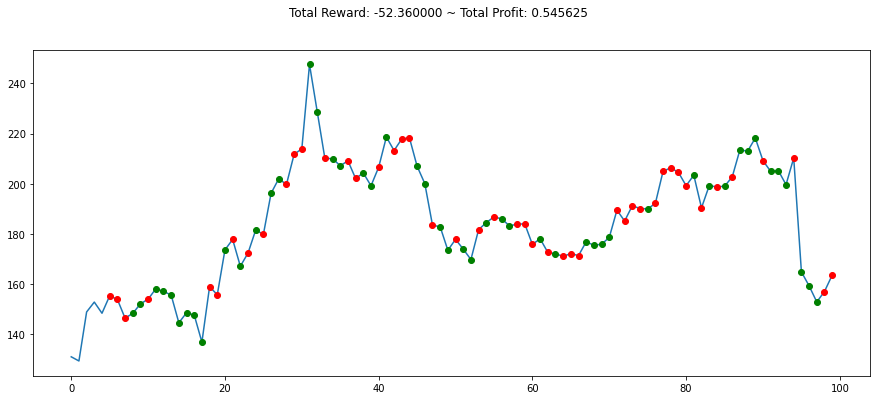

In [35]:
state = env.reset()
while True:
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done:
        print("info", info)
        break
    
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()